In [7]:
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan,euclidean
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.visualise_layouts_and_metrics.plot import show_layout, show_generation_metrics
from sklearn.decomposition import PCA
from time import perf_counter
import numpy as np
from pathlib import Path
from definitions import PROJECT_ROOT
import matplotlib.pyplot as plt
import pickle


In [2]:
rna = DataFetcher.fetch_data('rna N3k')
coli20 =  DataFetcher.fetch_data('coil20')
globe = DataFetcher.fetch_data('globe', size=7000)
fmnist = DataFetcher.fetch_data('fashion mnist', size=7000)
mnist = DataFetcher.fetch_data('mnist', size=7000)

datasets = [rna, coli20,globe,fmnist, mnist]
dataset_names = [dataset.name for dataset in datasets]
layouts = {name : {"knnd": [], "no knnd":[]} for name in dataset_names }
times = {name : {"knnd": [], "no knnd":[]} for name in dataset_names }
num_repeats = 10

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################
####################
Fetching the "globe" dataset
####################
Dataset loaded
Dataset shape: (7003, 3)
####################
####################
Fetching the "fashion mnist" dataset
####################
Dataset loaded
Dataset shape: (7000, 784)
####################
####################
Fetching the "mnist" dataset


C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


####################
Dataset loaded
Dataset shape: (7000, 784)
####################


In [3]:
results = {name : [] for name in dataset_names}
repeats = 10
for dataset in datasets:
    for i in range(repeats):
        print(dataset.name)
        algo96 = Chalmers96(dataset=dataset, distance_fn=euclidean,
                 spring_constant=0.6, record_neighbour_updates=True,
                use_knnd=False)
        layout = LayoutCreation.create_layout(algo96, no_iters=120)
        results[dataset.name].append(algo96)

output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/knnd/out/"))).resolve().absolute()

path_to_pickle_lay = (Path(output_dir).joinpath(Path(f"update_counts_algos.pickle"))).resolve()
with open(path_to_pickle_lay, 'wb') as pickle_out:
    pickle.dump(results, pickle_out)

rna N3k
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.6 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################
rna N3k
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
################

In [4]:
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/knnd/out/"))).resolve().absolute()

path_to_pickle = (Path(output_dir).joinpath(Path(f"update_counts_algos.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    update_counts = pickle.load(file)



In [6]:
results_arr = np.zeros((10,120, 5)) # 10 repeats, 120 iters and 5 datasets
names = ['rna N3k','coil20', 'globe', 'fashion mnist', 'mnist']


for name, algos in update_counts.items():
    index = names.index(name)
    for i,a in enumerate(algos):
        results_arr[i,:,index] = a.neighbour_updates

print(results_arr)




[[[2.4829e+04 1.2069e+04 5.8380e+04 5.8126e+04 5.8076e+04]
  [1.4110e+04 6.8880e+03 3.2508e+04 3.2627e+04 3.3165e+04]
  [8.4340e+03 4.1830e+03 1.9389e+04 1.9325e+04 1.9388e+04]
  ...
  [8.3000e+01 3.3000e+01 2.6400e+02 2.7100e+02 2.6400e+02]
  [1.0600e+02 3.4000e+01 2.7100e+02 2.6500e+02 2.8300e+02]
  [1.0500e+02 2.6000e+01 2.6900e+02 2.8500e+02 2.5100e+02]]

 [[2.5189e+04 1.1958e+04 5.8254e+04 5.8102e+04 5.8429e+04]
  [1.4326e+04 6.8670e+03 3.2905e+04 3.2334e+04 3.2957e+04]
  [8.3560e+03 3.9810e+03 1.9520e+04 1.9210e+04 1.9468e+04]
  ...
  [9.5000e+01 3.2000e+01 2.8900e+02 2.5600e+02 2.8200e+02]
  [8.8000e+01 3.3000e+01 3.0000e+02 2.6100e+02 2.9600e+02]
  [1.1400e+02 3.9000e+01 2.8100e+02 2.3500e+02 2.9800e+02]]

 [[2.4868e+04 1.2097e+04 5.8575e+04 5.8483e+04 5.8102e+04]
  [1.4091e+04 6.7750e+03 3.2955e+04 3.2581e+04 3.3033e+04]
  [8.1080e+03 3.8690e+03 1.9329e+04 1.9346e+04 1.9333e+04]
  ...
  [1.0000e+02 3.6000e+01 2.7700e+02 2.7300e+02 2.5100e+02]
  [1.0000e+02 3.9000e+01 2.5100e+0

<function matplotlib.pyplot.show(close=None, block=None)>

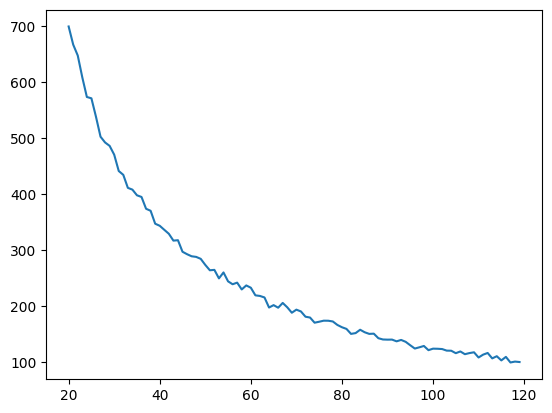

In [22]:
fig, ax = plt.subplots()

ax.plot(np.arange(20,120), np.mean(results_arr[:,20:,0], axis=0))
plt.show